In [1]:
import os
import pandas as pd

In [2]:
root = os.getcwd()
data = os.path.join(root,'data')

In [3]:
# map = {}

# for folder in os.listdir(data) : 
#     label = folder.split('_')[0]

#     video_paths = os.listdir(os.path.join(data,folder,folder))

#     new_path = []

#     for string in video_paths : 
#         new_path.append(os.path.join(folder,folder,string))

#     map[label] = new_path

# print(map)

{'accident': ['accident_Cropped/accident_Cropped/accident_Crop_012_01.avi', 'accident_Cropped/accident_Cropped/accident_Crop_011_01.avi', 'accident_Cropped/accident_Cropped/accident_Crop_026_02.avi', 'accident_Cropped/accident_Cropped/accident_Crop_003_02.avi', 'accident_Cropped/accident_Cropped/accident_Crop_002_01.avi', 'accident_Cropped/accident_Cropped/accident_Crop_025_01.avi', 'accident_Cropped/accident_Cropped/accident_Crop_008_01.avi', 'accident_Cropped/accident_Cropped/accident_Crop_023_02.avi', 'accident_Cropped/accident_Cropped/accident_Crop_019_02.avi', 'accident_Cropped/accident_Cropped/accident_Crop_009_02.avi', 'accident_Cropped/accident_Cropped/accident_Crop_014_01.avi', 'accident_Cropped/accident_Cropped/accident_Crop_012_02.avi', 'accident_Cropped/accident_Cropped/accident_Crop_004_02.avi', 'accident_Cropped/accident_Cropped/accident_Crop_017_02.avi', 'accident_Cropped/accident_Cropped/accident_Crop_010_01.avi', 'accident_Cropped/accident_Cropped/accident_Crop_006_02.

In [4]:
# vid_link = []
# label = []
# numerical = []

# count = 0

# label_num_map = {}

# for key in map.keys() :
#     for i in range(len(map[key])) : 
#         vid_link.append(map[key][i])    
#         label.append(key)
#         numerical.append(count)

#     count += 1

# df = pd.DataFrame(columns=["vid","label","label_num"])

# df['vid'] = vid_link
# df['label'] = label
# df['label_num'] = numerical

In [5]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vid        412 non-null    object
 1   label      412 non-null    object
 2   label_num  412 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.8+ KB


In [6]:
# df.head()

,vid,label,label_num
0,accident_Cropped/accident_Cropped/accident_Cro...,accident,0
1,accident_Cropped/accident_Cropped/accident_Cro...,accident,0
2,accident_Cropped/accident_Cropped/accident_Cro...,accident,0
3,accident_Cropped/accident_Cropped/accident_Cro...,accident,0
4,accident_Cropped/accident_Cropped/accident_Cro...,accident,0


In [7]:
# os.path.join(data,df['vid'][0])

'/home/karan/temp/data/accident_Cropped/accident_Cropped/accident_Crop_012_01.avi'

In [8]:
# import cv2

# max_frames = 0
# min_frames = 150

# for i in range(len(df)) : 
#     vidcap = cv2.VideoCapture(os.path.join(data,df['vid'][i]))

#     total_frames = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
#     max_frames = max(total_frames,max_frames)
#     min_frames = min(total_frames, min_frames)

# print(max_frames, min_frames)

132.0 48.0


In [9]:
# from sklearn.model_selection import train_test_split

In [10]:
# train, test = train_test_split(df, test_size = 0.2, stratify = df['label'], random_state=42)

In [11]:
# train, val = train_test_split(train, test_size=0.2, stratify=train['label'], random_state=42)

In [48]:
# train.to_csv('/home/karan/temp/csv_data/train.csv')
# val.to_csv('/home/karan/temp/csv_data/val.csv')
# test.to_csv('/home/karan/temp/csv_data/test.csv')

In [3]:
train = pd.read_csv(os.path.join(root,'csv_data','train.csv'))
val = pd.read_csv(os.path.join(root,'csv_data','val.csv'))
test = pd.read_csv(os.path.join(root,'csv_data','test.csv'))

In [4]:
train.columns

Index(['Unnamed: 0', 'vid', 'label', 'label_num'], dtype='object')

In [55]:
label_map = {}

for i in range(len(train)):
    if train['label'].iloc[i] not in label_map:
        label_map[train['label'].iloc[i]] = train['label_num'].iloc[i]
    
    if len(label_map.keys()) == 8:
        break

In [56]:
label_map

{'hot': 2,
 'doctor': 5,
 'help': 1,
 'call': 4,
 'lose': 6,
 'accident': 0,
 'thief': 3,
 'pain': 7}

In [12]:
# train.to_csv(os.path.join(data, 'train.csv'))
# val.to_csv(os.path.join(data, 'val.csv'))
# test.to_csv(os.path.join(data, 'test.csv'))

In [13]:
train['vid'][0]

'accident_Cropped/accident_Cropped/accident_Crop_012_01.avi'

In [4]:
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import videotransforms
from datasets.nslt_dataset import NSLT as Dataset

In [5]:
torch.cuda.device_count()

2

In [6]:
device = torch.device('cuda:1')

In [7]:
batch_size = 4

In [8]:
train_transforms = transforms.Compose([videotransforms.RandomCrop(224),
                                       videotransforms.RandomHorizontalFlip(),])

test_transforms = transforms.Compose([videotransforms.CenterCrop(224)])

train_loader = DataLoader(Dataset(data,train,train_transforms),batch_size=batch_size)
val_loader = DataLoader(Dataset(data,val,test_transforms),batch_size=batch_size)
test_loader = DataLoader(Dataset(data,test,test_transforms),batch_size=batch_size)

In [9]:
next(iter(train_loader))

[tensor([[[[[-0.2392, -0.2549, -0.2392,  ..., -0.2235, -0.2471, -0.2314],
            [-0.2078, -0.2157, -0.2078,  ..., -0.2471, -0.2549, -0.2392],
            [-0.2078, -0.1922, -0.1922,  ..., -0.2627, -0.2706, -0.2627],
            ...,
            [-0.3098, -0.3020, -0.2941,  ..., -0.3490, -0.3098, -0.3020],
            [-0.2863, -0.2941, -0.3020,  ..., -0.3647, -0.3255, -0.3098],
            [-0.2627, -0.2784, -0.3098,  ..., -0.3333, -0.3333, -0.3490]],
 
           [[-0.2471, -0.2471, -0.2392,  ..., -0.2314, -0.2314, -0.2392],
            [-0.2706, -0.2471, -0.2392,  ..., -0.2706, -0.2392, -0.2392],
            [-0.2471, -0.2157, -0.2235,  ..., -0.2706, -0.2706, -0.2863],
            ...,
            [-0.3020, -0.2941, -0.2784,  ..., -0.2941, -0.3098, -0.2706],
            [-0.2706, -0.2941, -0.2784,  ..., -0.2863, -0.2706, -0.2784],
            [-0.2784, -0.2941, -0.2863,  ..., -0.3020, -0.3020, -0.3333]],
 
           [[-0.2471, -0.2392, -0.2392,  ..., -0.2784, -0.2863, -0.2863]

In [10]:
class Fushion(nn.Module):

    def __init__(self):
        super(Fushion, self).__init__()

        self.conv1 = nn.Conv3d(3, 6, kernel_size=(1, 5, 5))
        self.pool1 = nn.AvgPool3d(kernel_size=(1, 4, 4), stride=(1, 2, 2))
        self.normal1 = nn.BatchNorm3d(6)

        self.conv2 = nn.Conv3d(6, 9, kernel_size=(1, 5, 5))
        self.pool2 = nn.AvgPool3d(kernel_size=(1, 4, 4), stride=(1, 2, 2))
        self.normal2 = nn.BatchNorm3d(9)

        self.lstm1 = nn.LSTM(input_size = 23409, hidden_size = 2048 , num_layers = 1, batch_first = True)

        self.conv3 = nn.Conv3d(3, 16, kernel_size = (2, 5, 5))
        self.pool3 = nn.AvgPool3d(kernel_size=(2, 4, 4), stride=(1, 2, 2))
        self.normal3 = nn.BatchNorm3d(16)

        self.conv4 = nn.Conv3d(16, 32, kernel_size=(2, 5, 5))
        self.pool4 = nn.AvgPool3d(kernel_size=(2, 4, 4), stride=(1, 2, 2))
        self.normal4 = nn.BatchNorm3d(32)

        self.global_pool = nn.AdaptiveAvgPool3d((4, 4, 4))

        self.dense1 = nn.Linear(2048, 1024)
        self.dense2 = nn.Linear(1024, 8)

        self.norm1 = nn.BatchNorm1d(2048)
        self.norm2 = nn.BatchNorm1d(1024)

    def forward(self, x1, x2):

        x1 = self.conv1(x1)
        x1 = F.relu(x1)
        x1 = self.pool1(x1)
        x1 = self.normal1(x1)

        x1 = self.conv2(x1)
        x1 = F.relu(x1)
        x1 = self.pool2(x1)
        x1 = self.normal2(x1)

        x1 = torch.permute(x1, (0, 2, 1, 3, 4))
        

        x1 = x1.reshape(x1.shape[0], x1.shape[1], -1)
        x1 = self.lstm1(x1)[0][:, -1]

        x2 = self.conv3(x2)
        x2 = F.relu(x2)
        x2 = self.pool3(x2)
        x2 = self.normal3(x2)

        x2 = self.conv4(x2)
        x2 = F.relu(x2)
        x2 = self.pool4(x2)
        x2 = self.normal4(x2)
        x2 = self.global_pool(x2)
        x2 = nn.Flatten()(x2)
        # print(x2.shape)

        x = torch.add(x1, x2)
        x = self.norm1(x)

        x = self.dense1(x)
        x = F.relu(x)
        x = self.norm2(x)
        x = self.dense2(x)

        return F.softmax(x, dim = 1)

In [10]:
class CNN_3D(nn.Module):

    def __init__(self):
        super(CNN_3D, self).__init__()

        self.conv1 = nn.Conv3d(3, 6, kernel_size = (2, 5, 5))
        self.pool1 = nn.AvgPool3d(kernel_size=(2, 4, 4), stride=(1, 2, 2))
        self.normal1 = nn.BatchNorm3d(6)

        self.conv2 = nn.Conv3d(6, 12, kernel_size=(2, 5, 5))
        self.pool2 = nn.AvgPool3d(kernel_size=(2, 4, 4), stride=(1, 2, 2))
        self.normal2 = nn.BatchNorm3d(12)

        self.global_pool = nn.AdaptiveAvgPool3d((1, 1, 1))

        self.dense1 = nn.Linear(12, 8)

    def forward(self, x):

        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = self.normal1(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)
        x = self.normal2(x)

        x = self.global_pool(x)

        x = x.reshape(x.shape[0], -1)

        x = self.dense1(x)
        x = F.relu(x)

        x = F.softmax(x, dim = 1)

        return x

        

In [11]:
class CNN_LSTM(nn.Module):

    def __init__(self):
        super(CNN_LSTM, self).__init__()

        self.conv1 = nn.Conv3d(3, 6, kernel_size=(1, 5, 5))
        self.pool1 = nn.AvgPool3d(kernel_size=(1, 4, 4), stride=(1, 2, 2))
        self.normal1 = nn.BatchNorm3d(6)

        self.conv2 = nn.Conv3d(6, 9, kernel_size=(1, 5, 5))
        self.pool2 = nn.AvgPool3d(kernel_size=(1, 4, 4), stride=(1, 2, 2))
        self.normal2 = nn.BatchNorm3d(9)

        self.lstm1 = nn.LSTM(input_size = 23409, hidden_size = 2056 , num_layers = 1, batch_first = True)

        self.dense1 = nn.Linear(2056, 512)
        self.dense2 = nn.Linear(512, 8)

        self.dropout = nn.Dropout(0.3)

    
    def forward(self, x):
        
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = self.normal1(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)
        x = self.normal2(x)
        
        x = torch.permute(x, (0, 2, 1, 3, 4))
        

        x = x.reshape(x.shape[0], x.shape[1], -1)
        x = self.lstm1(x)[0][:, -1]

        x = self.dense1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.dense2(x)
        x = F.softmax(x, dim = 1)

        return x

In [11]:
model = Fushion().to(device)

In [12]:
lr = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

In [13]:
len(train_loader)

66

In [14]:
train_loss = []
val_loss = []
train_accuracy = []
val_accuracy = []

epochs = 8

for ep in range(epochs):

  batch_train_loss = 0
  num_train_batches = len(train_loader)
  train_samples = 0
  train_acc = 0
  total_train_loss = 0

  for step, (vids, labels) in enumerate(train_loader):

    if step != 0 and step % 10 == 0:
      print('step: {}, loss: {}, accuracy: {}'.format(step, batch_train_loss/step+1, train_acc/((step + 1)*batch_size)))

    vids = vids.to(device)
    
    labels = labels.to(device)
    labels = labels.reshape((labels.shape[0]))

    train_samples += labels.size(0)
    # print(vids.shape)
    model_output = model(vids, vids)
    # print(model_output.shape)

    optimizer.zero_grad()
    loss = loss_fn(model_output, labels)
    loss.backward()
    optimizer.step()

    cur_loss = loss.item()
    batch_train_loss += cur_loss

    _, predicted_labels = torch.max(model_output, 1)

    labels = labels.float()

    train_acc += torch.eq(labels, predicted_labels).sum().item()
  
  total_train_loss = batch_train_loss/ num_train_batches
  train_acc /= train_samples

  with torch.no_grad():

    batch_val_loss = 0
    num_val_batches = len(val_loader)
    val_samples = 0
    val_acc = 0
    total_val_loss = 0

    for step, (vids, labels) in enumerate(val_loader):

      vids = vids.to(device)
      labels = labels.to(device)
      
      labels = labels.reshape((labels.shape[0]))
      val_samples += labels.size(0)

      model_output = model(vids, vids)

      loss = loss_fn(model_output, labels)

      cur_loss = loss.item()

      batch_val_loss += cur_loss

      _, predicted_labels = torch.max(model_output, 1)

      labels.float()

      val_acc += torch.eq(labels, predicted_labels).sum().item()
    
    total_val_loss = batch_val_loss/ num_val_batches
    val_acc /= val_samples

  print('Training loss: {}, Training accuracy: {}, Validation loss: {}, Validation accuracy: {}'.format(total_train_loss, train_acc, total_val_loss, val_acc))
  train_loss.append(total_train_loss)
  val_loss.append(total_val_loss)
  train_accuracy.append(train_acc)
  val_accuracy.append(val_acc)

step: 10, loss: 3.0030965566635133, accuracy: 0.22727272727272727
step: 20, loss: 2.966126501560211, accuracy: 0.27380952380952384
step: 30, loss: 2.9581398089726765, accuracy: 0.28225806451612906
step: 40, loss: 2.9665326923131943, accuracy: 0.2682926829268293
step: 50, loss: 2.9516014981269834, accuracy: 0.28921568627450983
step: 60, loss: 2.9619110584259034, accuracy: 0.2786885245901639
Training loss: 1.9564012144551133, Training accuracy: 0.2889733840304182, Validation loss: 1.9187605871873743, Validation accuracy: 0.3181818181818182
step: 10, loss: 2.809254157543182, accuracy: 0.45454545454545453
step: 20, loss: 2.7512705981731416, accuracy: 0.5119047619047619
step: 30, loss: 2.741425931453705, accuracy: 0.532258064516129
step: 40, loss: 2.745414897799492, accuracy: 0.524390243902439
step: 50, loss: 2.7655952620506286, accuracy: 0.5049019607843137
step: 60, loss: 2.783565910657247, accuracy: 0.48770491803278687
Training loss: 1.776995640812498, Training accuracy: 0.501901140684410

In [15]:
torch.save(model, '/home/karan/temp/saved_models/model3.h5')

In [16]:
import matplotlib.pyplot as plt

In [17]:
def plot_loss(train_loss, val_loss):

  plt.plot(train_loss, label = 'Training loss')
  plt.plot(val_loss, label = 'Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend(frameon = False)

In [18]:
def plot_acc(train_acc, val_acc):

  plt.plot(train_acc, label = 'Training accuracy')
  plt.plot(val_acc, label = 'Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.legend(frameon = False)

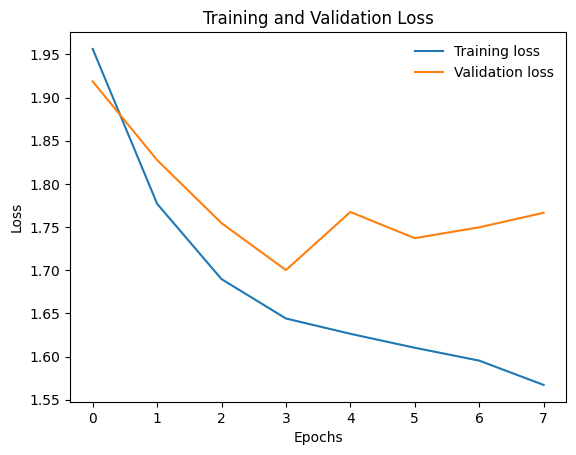

In [19]:
plot_loss(train_loss, val_loss)

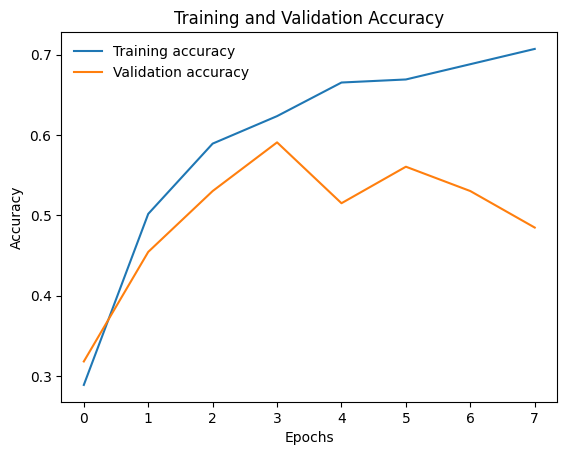

In [20]:
plot_acc(train_accuracy, val_accuracy)

In [21]:
model3 = torch.load('/home/karan/temp/saved_models/model3.h5')

In [23]:
actual = []
preds = []
with torch.no_grad():

    batch_test_loss = 0
    num_test_batches = len(test_loader)
    test_samples = 0
    test_acc = 0
    total_test_loss = 0

    for step, (vids, labels) in enumerate(test_loader):

      vids = vids.to(device)
      labels = labels.to(device)
      labels = labels.reshape((labels.shape[0]))
      test_samples += labels.size(0)

      model_output = model(vids, vids)

      loss = loss_fn(model_output, labels)

      cur_loss = loss.item()

      batch_test_loss += cur_loss

      _, predicted_labels = torch.max(model_output, 1)

      labels.float()

      test_acc += torch.eq(labels, predicted_labels).sum().item()
      actual.append(labels.cpu().numpy())
      preds.append(predicted_labels.cpu().numpy())    
    total_test_loss = batch_test_loss/ num_test_batches
    test_acc /= test_samples

In [24]:
test_acc

0.6265060240963856

In [25]:
total_test_loss

1.6768352531251454

In [27]:
import numpy as np

In [29]:
actual_final = np.hstack(actual)

In [31]:
preds_final = np.hstack(preds)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(classification_report(actual_final, preds_final))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.47      0.73      0.57        11
           2       0.75      0.82      0.78        11
           3       0.78      0.70      0.74        10
           4       0.33      0.20      0.25        10
           5       0.71      0.91      0.80        11
           6       0.62      0.50      0.56        10
           7       0.57      0.40      0.47        10

    accuracy                           0.63        83
   macro avg       0.62      0.62      0.61        83
weighted avg       0.62      0.63      0.61        83



In [57]:
label_map

{'hot': 2,
 'doctor': 5,
 'help': 1,
 'call': 4,
 'lose': 6,
 'accident': 0,
 'thief': 3,
 'pain': 7}

In [59]:
actual

array([5, 7, 6, 1, 7, 7, 4, 3, 0, 3, 3, 0, 0, 7, 5, 4, 1, 6, 4, 5, 0, 2,
       3, 4, 6, 5, 2, 1, 0, 3, 5, 6, 6, 1, 1, 5, 1, 2, 5, 2, 6, 4, 3, 2,
       7, 1, 7, 4, 0, 4, 5, 1, 4, 5, 2, 2, 4, 6, 6, 5, 0, 2, 7, 3, 4, 2,
       0, 6, 3, 5, 1, 7, 1, 1, 7, 6, 0, 3, 2, 2])

In [61]:
preds

array([5, 1, 3, 7, 2, 7, 2, 1, 0, 3, 7, 6, 0, 7, 5, 4, 1, 7, 7, 6, 0, 2,
       3, 3, 0, 5, 2, 1, 0, 7, 0, 7, 6, 3, 1, 2, 1, 2, 5, 2, 3, 2, 3, 2,
       4, 7, 7, 7, 0, 4, 5, 7, 7, 5, 6, 2, 7, 2, 1, 5, 5, 2, 2, 3, 7, 7,
       0, 7, 3, 5, 1, 7, 0, 1, 7, 6, 0, 2, 7, 2])

In [35]:
confusion_matrix(actual_final, preds_final)

array([[ 7,  1,  0,  0,  1,  1,  0,  0],
       [ 1,  8,  0,  0,  1,  1,  0,  0],
       [ 0,  1,  9,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  7,  0,  1,  1,  1],
       [ 0,  4,  1,  1,  2,  0,  1,  1],
       [ 0,  1,  0,  0,  0, 10,  0,  0],
       [ 1,  1,  0,  0,  1,  1,  5,  1],
       [ 1,  1,  2,  1,  1,  0,  0,  4]])

In [65]:
from torchviz import make_dot

In [ ]:
make_dot()